In [1]:
import bz2
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests

FILEPATH = 'quotes-2019-nytimes.json.bz2'

with bz2.open(FILEPATH, "rt") as bzinput:
    file = []
    for i, line in enumerate(bzinput):
        tweets = json.loads(line)
        file.append(tweets)
type(file)

list

In [ ]:
with bz2.open('/Users/geoffraymarie/Downloads/quotes-2019.json.bz2', "rt") as bzinput:
    file = []
    for i, line in enumerate(bzinput):
        tweets = json.loads(line)
        file.append(tweets)
type(file)

In [6]:
df = pd.DataFrame(file)
df.head(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E
5,2019-08-15-002017,A Senator we can call our own.,Tom Rath,[Q7817334],2019-08-15 22:36:33,1,"[[Tom Rath, 0.7598], [None, 0.1993], [Warren R...",[http://www.nytimes.com/2019/08/15/us/politics...,E
6,2019-02-12-002452,"a thorn in the side of cabinet,",None,[],2019-02-12 16:43:04,8,"[[None, 0.463], [Jody Wilson-Raybould, 0.4073]...",[https://castlegarsource.com/news/letter-apolo...,E
7,2019-01-28-048557,"It was just on a lark,",None,[],2019-01-28 18:32:47,2,"[[None, 0.5762], [Alexander the Great, 0.2153]...",[http://www.nytimes.com/2019/01/28/health/micr...,E
8,2019-07-22-032883,"It's a success, a relief and a technical feat,",Florence Parly,[Q3074013],2019-07-22 02:37:50,21,"[[Florence Parly, 0.9262], [None, 0.0738]]",[http://www.breitbart.com/news/french-submarin...,E
9,2019-12-31-002666,always appreciates and respects the work and a...,None,[],2019-12-31 22:09:50,3,"[[None, 0.8953], [President Trump, 0.1047]]",[http://www.ibtimes.com/climate-change-epa-sci...,E


In [5]:
df['date']= pd.to_datetime(df['date'])
df.dtypes

NameError: name 'df' is not defined

In [8]:
sparql_query = """
        prefix schema: <http://schema.org/>
        SELECT ?item ?occupation ?genderLabel ?bdayLabel
        WHERE {
            <https://www.wikidata.org/wiki/Q3074013> schema:about ?item .
            ?item wdt:P106 ?occupation .
            ?item wdt:P21 ?gender .
            ?item wdt:P569 ?bday .
            SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
        }
    """

In [9]:
url = 'https://query.wikidata.org/sparql'

r = requests.get(url, params={'format': 'json', 'query': sparql_query})
data = r.json()


In [10]:
print(data['results']['bindings'])

[]


In [ ]:
query = """SELECT ?book ?title ?illustratorLabel ?publisherLabel ?published
    WHERE
    {
      ?book wdt:P50 wd:Q35610.
      OPTIONAL {
        ?book wdt:P1476 ?title;
              wdt:P110 ?illustrator;
              wdt:P123 ?publisher;
              wdt:P577 ?published.
      }
      SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
    }
    """
r = requests.get(url, params={'format': 'json', 'query': query})
data = r.json()
print(data['results']['bindings'])

In [5]:
l= df['urls'][0][0]

In [30]:
l

'https://www.nytimes.com/2019/04/17/realestate/house-hunting-in-hong-kong.html?partner=rss&emc=rss'

In [3]:
def extract_url(string):
    paper = ''
    l = 0
    while l<len(string) and string[l] != '/':
        l+=1
    l+=2
    while l<len(string) and string[l] != '/':
        paper = paper + string[l]
        l+=1
    return paper

In [9]:
rep = extract_url(l)
print(rep)

www.nytimes.com


In [7]:
import collections
counter = collections.Counter()
for k in range (df.shape[0]):
    paper = extract_url(df['urls'][k][0])
    counter[paper] += 1

In [8]:
counter = pd.DataFrame(counter, index=[0]).T

In [9]:
counter = counter.sort_values(by = [0], ascending = False).iloc[:20]
counter.head(20)

,0
www.nytimes.com,129323
nytimes.com,26362
mobile.nytimes.com,18255
www.seattletimes.com,3820
feeds.nytimes.com,1187
hypervocal.com,1119
www.msn.com,928
feeds.foxnews.com,830
www.breitbart.com,741
www.theglobeandmail.com,717


In [98]:
counter.iloc[:3].sum()

0    173940
dtype: int64

In [99]:
173940/207527*100

83.81559989784462

In [86]:
counter.index.values

array(['www.nytimes.com', 'nytimes.com', 'mobile.nytimes.com',
       'www.seattletimes.com', 'feeds.nytimes.com', 'hypervocal.com',
       'www.msn.com', 'feeds.foxnews.com', 'www.breitbart.com',
       'www.theglobeandmail.com', 'feeds.themorningnews.org',
       'www.canindia.com', 'www.bostonglobe.com', 'www.pulse.ng',
       'www.bendbulletin.com', 'www.rawstory.com',
       'www.washingtontimes.com', 'www.pulse.com.gh',
       'www.businessinsider.com', 'dailyherald.com'], dtype=object)

In [84]:
counter.values.squeeze()

array([129323,  26362,  18255,   3820,   1187,   1119,    928,    830,
          741,    717,    501,    430,    372,    348,    346,    330,
          314,    302,    289,    286])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <BarContainer object of 19 artists>)

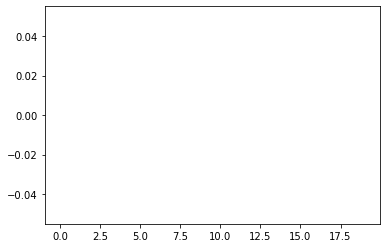

In [92]:
plt.hist(counter.values.squeeze(), [k for k in range(20)])

In [72]:
y[:20].squeeze()

array([129323,  26362,  18255,   3820,   1187,   1119,    928,    830,
          741,    717,    501,    430,    372,    348,    346,    330,
          314,    302,    289,    286])

In [63]:
y[0][0]

129323